In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df=pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300
3,151500,41300,58500,18500
4,180800,10800,58400,12900


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   TV         200 non-null    int64
 1   radio      200 non-null    int64
 2   newspaper  200 non-null    int64
 3   sales      200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


# Exploratory data analysis

In [6]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147042.500000,23264.000000,30554.000000,14022.500000
std,85854.236315,14846.809176,21778.620839,5217.456566
min,700.000000,0.000000,300.000000,1600.000000
25%,74375.000000,9975.000000,12750.000000,10375.000000
50%,149750.000000,22900.000000,25750.000000,12900.000000
75%,218825.000000,36525.000000,45100.000000,17400.000000
max,296400.000000,49600.000000,114000.000000,27000.000000


In [7]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

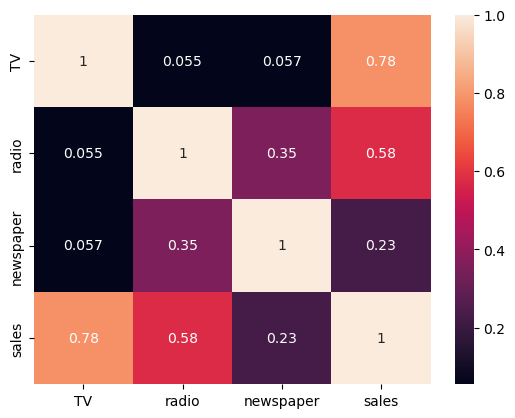

In [8]:
sns.heatmap(df.corr(),annot=True)

In [9]:
x=df[['TV','radio','newspaper']]
y=df['sales']

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

# Lasso Regression



Modelling with default parameter

In [11]:
from sklearn.linear_model import Lasso

lasso_model=Lasso()

lasso_model.fit(x_train,y_train)

Lasso()

# Prediction

In [22]:
train_predictions=lasso_model.predict(x_train)
test_Predictiontions=lasso_model.predict(x_test)

# Evaluation

In [23]:
from sklearn.metrics import mean_squared_error
train_rmse=np.sqrt(mean_squared_error(y_train,train_predictions))
test_rmse=np.sqrt(mean_squared_error(y_test,test_predictions))
print("Train Rmse",train_rmse)
print("Test Rmse",test_rmse)

Train Rmse 1574.596830590546
Test Rmse 1948.5372043175971


# Hyperparameter tuning

In [24]:
from sklearn.model_selection import GridSearchCV


In [25]:
estimator=Lasso()
param_grid={"alpha":[0.1,0.2,0.3,0.4,0.5,0.6,1]}

In [26]:
model_hp = GridSearchCV(estimator,param_grid,cv=5)
model_hp.fit(x_train,y_train)
model_hp.best_params_

{'alpha': 1}

In [27]:
train_predictions=lasso_model.predict(x_train)
test_predictions=lasso_model.predict(x_test)

In [28]:
from sklearn.metrics import mean_squared_error
train_rmse=np.sqrt(mean_squared_error(y_train,train_predictions))
test_rmse=np.sqrt(mean_squared_error(y_test,test_predictions))
print("Train Rmse",train_rmse)
print("Test Rmse",test_rmse)

Train Rmse 1574.596830590546
Test Rmse 1948.5371732825656


# Ridge Regression


# Modeling with default parameters

In [29]:
from sklearn.linear_model import Ridge

ridge_model=Ridge()

ridge_model.fit(x_train,y_train)

Ridge()

# Predictions

In [30]:
train_predictions=ridge_model.predict(x_train)
test_predictions=ridge_model.predict(x_test)

# Evaluation

In [31]:
from sklearn.metrics import mean_squared_error
train_rmse = np.sqrt(mean_squared_error(y_train,train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test,test_predictions))
print("train_rmse",train_rmse)
print("test_rmse",test_rmse)

train_rmse 1574.5968305905444
test_rmse 1948.5372043175971


# Hyperparameter Tunning

Identify the best alpha value for ridge Regression

In [32]:
from sklearn.model_selection import GridSearchCV

estimator=Ridge()

param_grid={"alpha":list(range(1,11))}

In [34]:
model_hp=GridSearchCV(estimator,param_grid,cv=5)

model_hp.fit(x_train,y_train)

model_hp.best_params_

{'alpha': 10}

# Elasticnet Regression

Modelling with deafault parameters

In [35]:
from sklearn.linear_model import ElasticNet

enr_model= ElasticNet()

enr_model.fit(x_train,y_train)

ElasticNet()

# Prediction

In [36]:
tets_predictions=enr_model.predict(x_test)
train_predictions=enr_model.predict(x_train)

# Evaluation

In [39]:
from sklearn.metrics import mean_squared_error
train_rmse = np.sqrt(mean_squared_error(y_train,train_predictions))
tets_rmse= np.sqrt(mean_squared_error(y_test,test_predictions))
print("train_rmse",train_rmse)
print("test_rmse",test_rmse)

train_rmse 1574.5968305905449
test_rmse 1948.5372043175971


# Hyperparameter Tunning

In [44]:
from sklearn.model_selection import GridSearchCV

estimator=ElasticNet()

param_grid = {"alpha":[0.1,0.2,1,2,3,5,10],"l1_ratio":[0.1,0.5,0.7,0.75,0.9,0.95,1]}


In [46]:
enr_hp= GridSearchCV(estimator,param_grid,cv=5)
enr_hp.fit(x_train,y_train)

enr_hp.best_params_

{'alpha': 10, 'l1_ratio': 1}